In [1]:
 import pandas as pd

In [3]:
# Load dataset
df = pd.read_csv('C:\\Users\\punit\\Downloads\\CloudWatch_Traffic_Web_Attack (1).csv')

In [5]:
df.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

In [7]:
df.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


In [9]:
# Check for missing values
missing_values = df.isnull().sum()
# Fill or drop missing values as needed
df['bytes_in'].fillna(df['bytes_in'].median(), inplace=True)
df.dropna(subset=['src_ip', 'dst_ip'], inplace=True)
# Convert columns to appropriate datatypes
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

C:\Users\punit\AppData\Local\Temp\ipykernel_2732\3445302904.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bytes_in'].fillna(df['bytes_in'].median(), inplace=True)


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

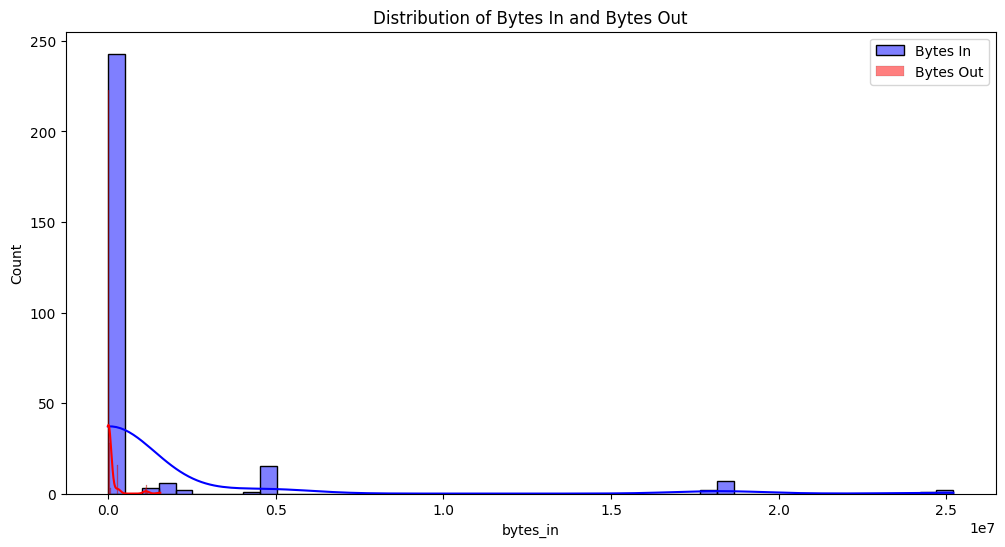

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(df['bytes_in'], bins=50, color='blue', kde=True,
label='Bytes In')
sns.histplot(df['bytes_out'], bins=50, color='red', kde=True,
label='Bytes Out')
plt.legend()
plt.title('Distribution of Bytes In and Bytes Out')
plt.show()

C:\Users\punit\AppData\Local\Temp\ipykernel_2732\4259760943.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='protocol', data=df, palette='viridis')


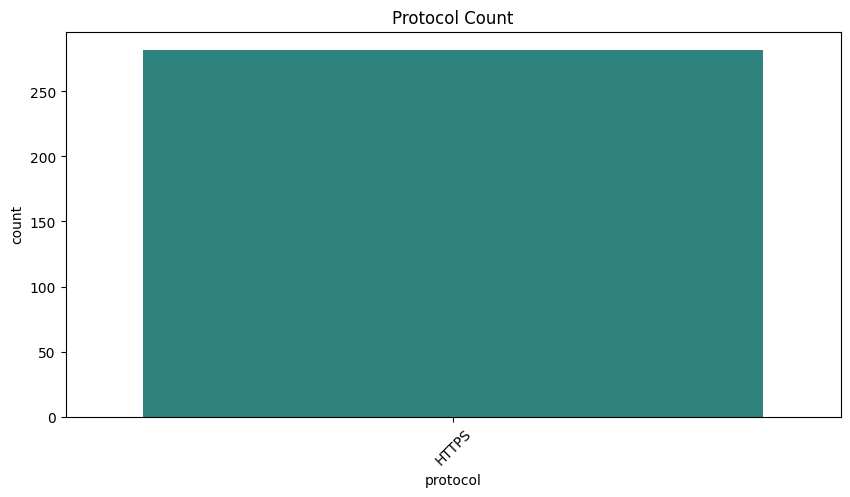

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(x='protocol', data=df, palette='viridis')
plt.title('Protocol Count')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Duration of the session in seconds
df['session_duration'] = (df['end_time']-df['creation_time']).dt.total_seconds()
# Average packet size
df['avg_packet_size'] = (df['bytes_in'] + df['bytes_out']) /df['session_duration']

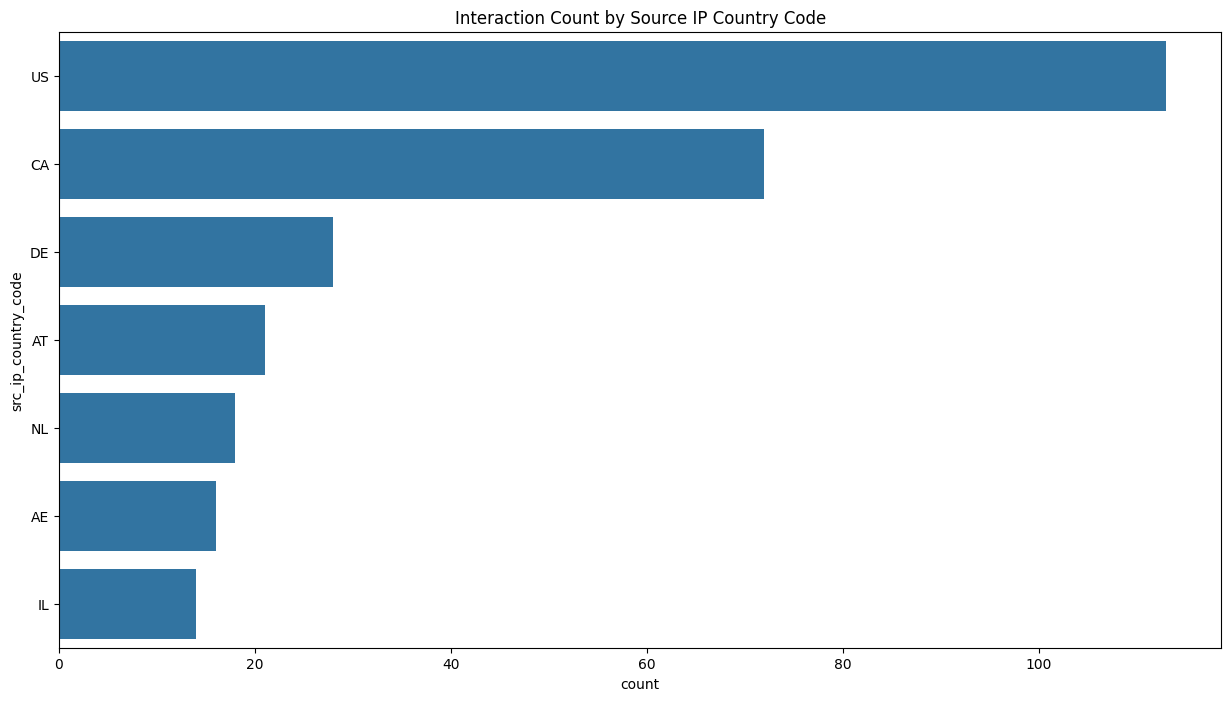

In [19]:
plt.figure(figsize=(15, 8))
sns.countplot(y='src_ip_country_code', data=df,
order=df['src_ip_country_code'].value_counts().index)
plt.title('Interaction Count by Source IP Country Code')
plt.show()

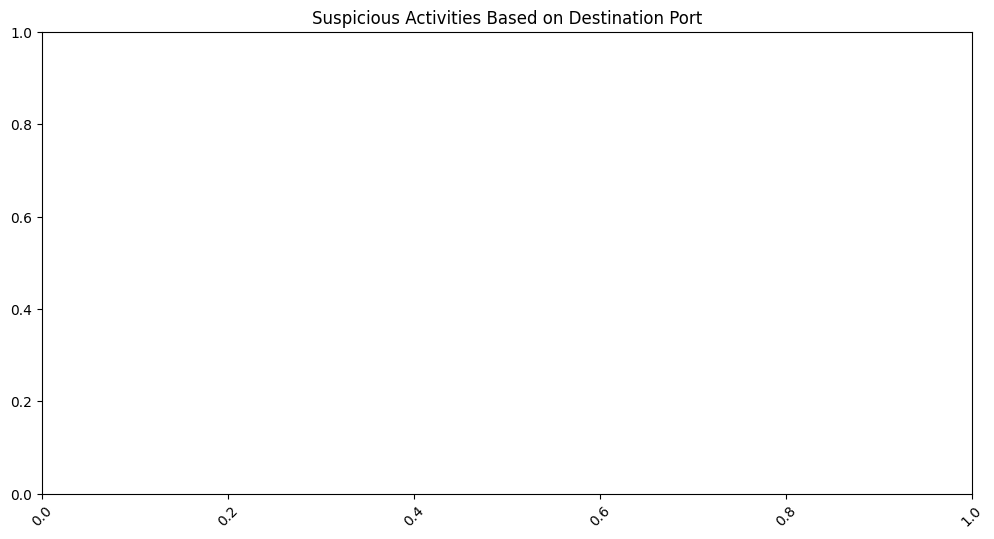

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x='dst_port', data=df[df['detection_types'] =='Suspicious'], palette='coolwarm')
plt.title('Suspicious Activities Based on Destination Port')
plt.xticks(rotation=45)
plt.show()

In [23]:
from sklearn.ensemble import IsolationForest
# Selecting features for anomaly detection
features = df[['bytes_in', 'bytes_out', 'session_duration','avg_packet_size']]
# Initialize the model
model = IsolationForest(contamination=0.05, random_state=42)
# Fit and predict anomalies
df['anomaly'] = model.fit_predict(features)
df['anomaly'] = df['anomaly'].apply(lambda x: 'Suspicious' if x==-1 else 'Normal')

In [25]:
# Check the proportion of anomalies detected
print(df['anomaly'].value_counts())
# Display anomaly samples
suspicious_activities = df[df['anomaly'] == 'Suspicious']
print(suspicious_activities.head())

anomaly
Normal        267
Suspicious     15
Name: count, dtype: int64
     bytes_in  bytes_out             creation_time                  end_time  \
36    4190330     283456 2024-04-25 23:30:00+00:00 2024-04-25 23:40:00+00:00   
87    1215594      64362 2024-04-26 00:30:00+00:00 2024-04-26 00:40:00+00:00   
116   4827283     306181 2024-04-26 01:00:00+00:00 2024-04-26 01:10:00+00:00   
132   1889834      34306 2024-04-26 01:20:00+00:00 2024-04-26 01:30:00+00:00   
153   4869181     301752 2024-04-26 01:40:00+00:00 2024-04-26 01:50:00+00:00   

             src_ip src_ip_country_code protocol  response.code  dst_port  \
36    155.91.45.242                  US    HTTPS            200       443   
87   165.225.240.79                  NL    HTTPS            200       443   
116   155.91.45.242                  US    HTTPS            200       443   
132  165.225.240.79                  NL    HTTPS            200       443   
153   155.91.45.242                  US    HTTPS            200 

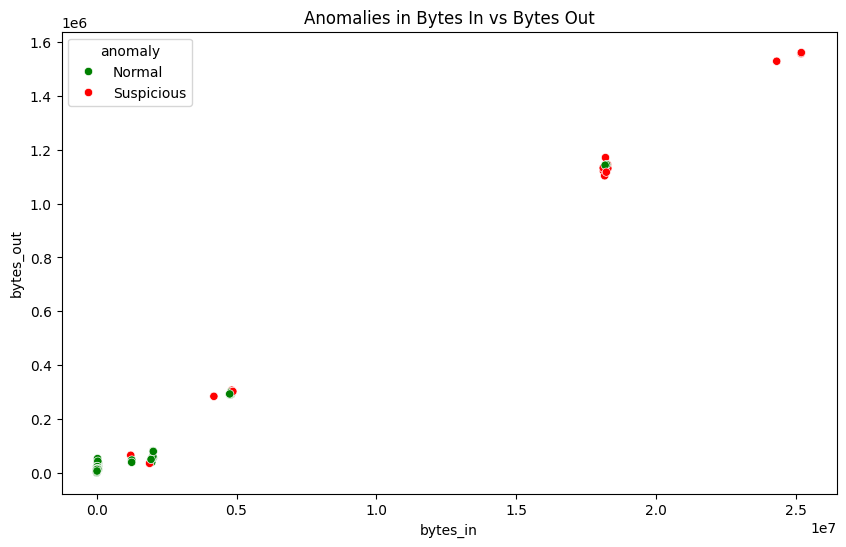

In [27]:
# Visualize bytes_in vs bytes_out with anomalies highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bytes_in', y='bytes_out', hue='anomaly',
data=df, palette=['green', 'red'])
plt.title('Anomalies in Bytes In vs Bytes Out')
plt.show()

In [35]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Conv1D,MaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

In [31]:
# Remove duplicate rows
df_unique = df.drop_duplicates()
# Convert time-related columns to datetime format
df_unique['creation_time'] =pd.to_datetime(df_unique['creation_time'])
df_unique['end_time'] = pd.to_datetime(df_unique['end_time'])
df_unique['time'] = pd.to_datetime(df_unique['time'])
# Standardize text data (example: convert to lower case)
df_unique['src_ip_country_code'] =df_unique['src_ip_country_code'].str.upper() # Ensuring country codes are all upper case
# Display changes and current state of the DataFrame
print("Unique Datasets Information:")
df_unique.info()

Unique Datasets Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   bytes_in             282 non-null    int64              
 1   bytes_out            282 non-null    int64              
 2   creation_time        282 non-null    datetime64[ns, UTC]
 3   end_time             282 non-null    datetime64[ns, UTC]
 4   src_ip               282 non-null    object             
 5   src_ip_country_code  282 non-null    object             
 6   protocol             282 non-null    object             
 7   response.code        282 non-null    int64              
 8   dst_port             282 non-null    int64              
 9   dst_ip               282 non-null    object             
 10  rule_names           282 non-null    object             
 11  observation_name     282 non-null    object            

In [33]:
print("Top 5 Unique Datasets Information:")
df_unique.head()

Top 5 Unique Datasets Information:


,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types,session_duration,avg_packet_size,anomaly
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,30.986667,Normal
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,81.830000,Normal
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,69.956667,Normal
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,74.706667,Normal
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,34.030000,Normal


In [35]:
 # Feature engineering: Calculate duration of connection
df_unique['duration_seconds'] = (df_unique['end_time']-df_unique['creation_time']).dt.total_seconds()
 # Preparing column transformations
# StandardScaler for numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_unique[['bytes_in','bytes_out', 'duration_seconds']])

In [37]:
# OneHotEncoder for categorical features
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df_unique[['src_ip_country_code']])
# Combining transformed features back into the DataFrame
scaled_columns = ['scaled_bytes_in', 'scaled_bytes_out','scaled_duration_seconds']
encoded_columns = encoder.get_feature_names_out(['src_ip_country_code'])

In [39]:
# Convert numpy arrays back to DataFrame
scaled_df = pd.DataFrame(scaled_features,columns=scaled_columns, index=df_unique.index)
encoded_df = pd.DataFrame(encoded_features,columns=encoded_columns, index=df_unique.index)
# Concatenate all the data back together
transformed_df=pd.concat([df_unique,scaled_df,encoded_df],axis=1)
# Displaying the transformed data
transformed_df.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,...,scaled_bytes_in,scaled_bytes_out,scaled_duration_seconds,src_ip_country_code_AE,src_ip_country_code_AT,src_ip_country_code_CA,src_ip_country_code_DE,src_ip_country_code_IL,src_ip_country_code_NL,src_ip_country_code_US
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,...,-0.288219,-0.281223,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,US,HTTPS,200,443,10.138.69.97,...,-0.282108,-0.260804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,...,-0.282689,-0.279344,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,US,HTTPS,200,443,10.138.69.97,...,-0.282197,-0.276161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,...,-0.287996,-0.277678,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
# Compute correlation matrix for numeric columns only
numeric_df = transformed_df.select_dtypes(include=['float64','int64'])
correlation_matrix_numeric = numeric_df.corr()
# Display the correlation matrix
correlation_matrix_numeric

,bytes_in,bytes_out,response.code,dst_port,session_duration,avg_packet_size,duration_seconds,scaled_bytes_in,scaled_bytes_out,scaled_duration_seconds,src_ip_country_code_AE,src_ip_country_code_AT,src_ip_country_code_CA,src_ip_country_code_DE,src_ip_country_code_IL,src_ip_country_code_NL,src_ip_country_code_US
bytes_in,1.000000,0.997705,NaN,NaN,NaN,0.999992,NaN,1.000000,0.997705,NaN,-0.070559,-0.081670,-0.166488,-0.095333,-0.065939,-0.006827,0.316015
bytes_out,0.997705,1.000000,NaN,NaN,NaN,0.997963,NaN,0.997705,1.000000,NaN,-0.072452,-0.081777,-0.159587,-0.090001,-0.067630,-0.045641,0.327683
response.code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dst_port,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
session_duration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_packet_size,0.999992,0.997963,NaN,NaN,NaN,1.000000,NaN,0.999992,0.997963,NaN,-0.070677,-0.081687,-0.166109,-0.095036,-0.066045,-0.009075,0.316730
duration_seconds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scaled_bytes_in,1.000000,0.997705,NaN,NaN,NaN,0.999992,NaN,1.000000,0.997705,NaN,-0.070559,-0.081670,-0.166488,-0.095333,-0.065939,-0.006827,0.316015
scaled_bytes_out,0.997705,1.000000,NaN,NaN,NaN,0.997963,NaN,0.997705,1.000000,NaN,-0.072452,-0.081777,-0.159587,-0.090001,-0.067630,-0.045641,0.327683
scaled_duration_seconds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


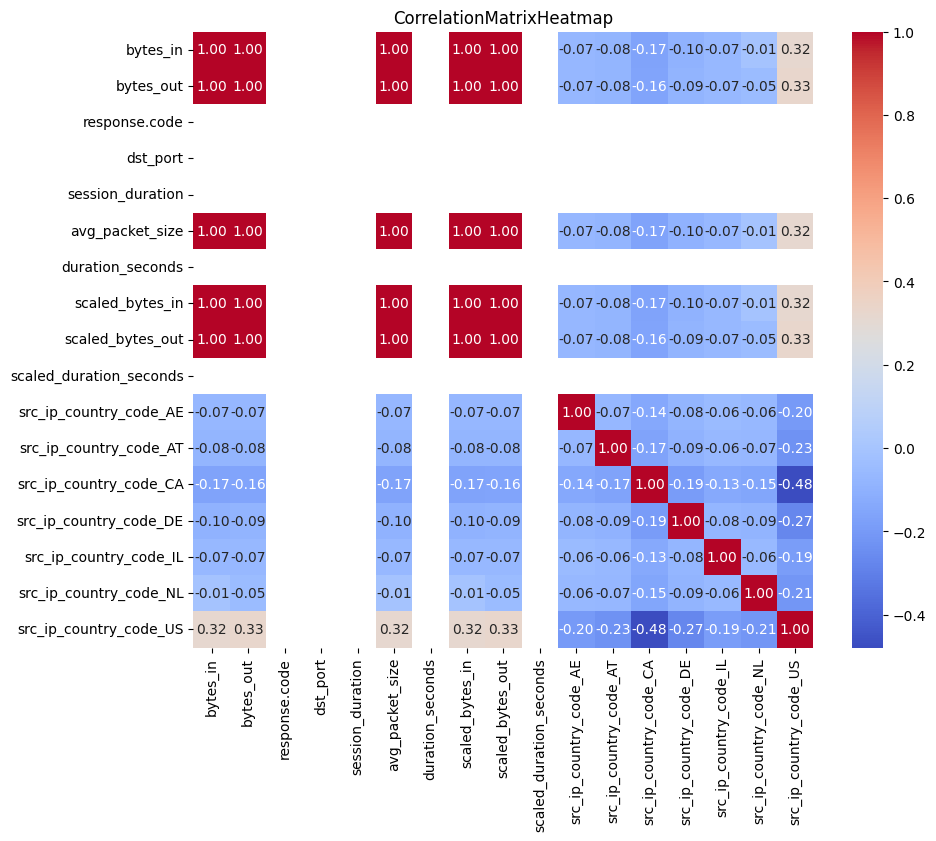

In [43]:
 # Heatmap for the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix_numeric,annot=True,fmt=".2f",cmap='coolwarm')
plt.title('CorrelationMatrixHeatmap')
plt.show()

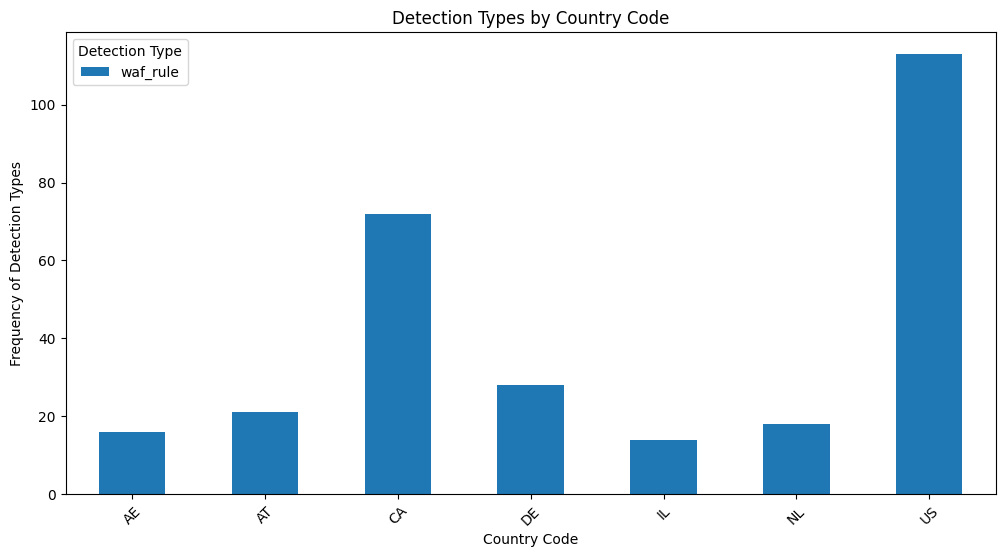

In [45]:
# Stacked Bar Chart for Detection Types by Country
 # Preparing data for stacked bar chart
detection_types_by_country =pd.crosstab(transformed_df['src_ip_country_code'],transformed_df['detection_types'])
detection_types_by_country.plot(kind='bar', stacked=True,figsize=(12, 6))
plt.title('Detection Types by Country Code')
plt.xlabel('Country Code')
plt.ylabel('Frequency of Detection Types')
plt.xticks(rotation=45)
plt.legend(title='Detection Type')
plt.show()

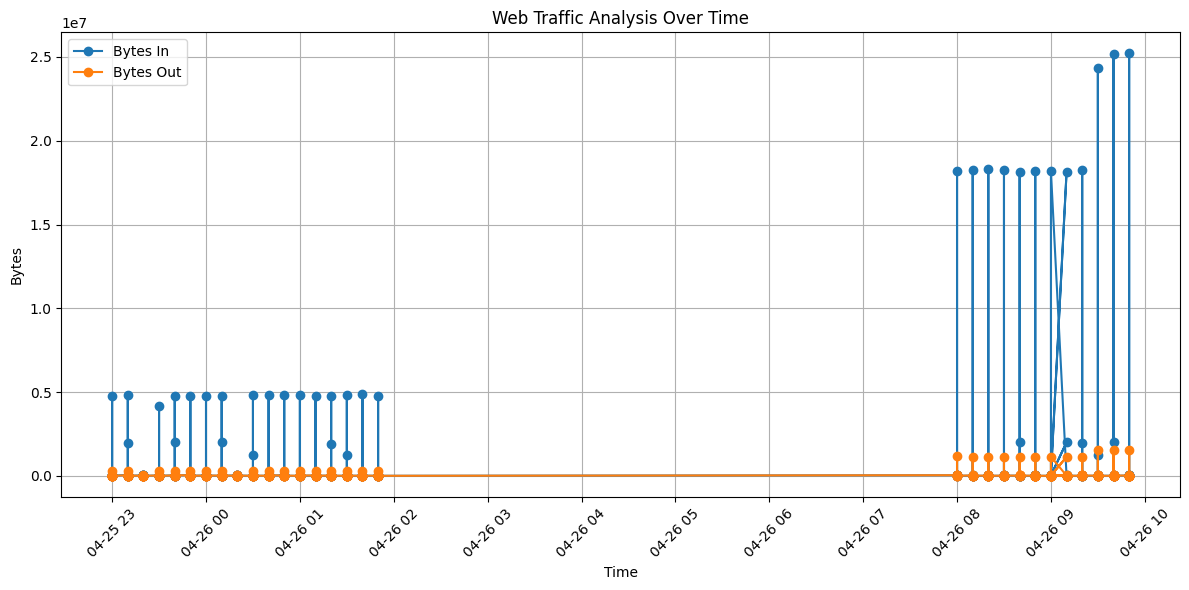

In [47]:
# Convert 'creation_time' to datetime format
df['creation_time'] = pd.to_datetime(df['creation_time'])
# Set 'creation_time' as the index
df.set_index('creation_time', inplace=True)
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['bytes_in'], label='Bytes In',marker='o')
plt.plot(df.index, df['bytes_out'], label='Bytes Out',marker='o')
plt.title('Web Traffic Analysis Over Time')
plt.xlabel('Time')
plt.ylabel('Bytes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
# Show the plot
plt.show()

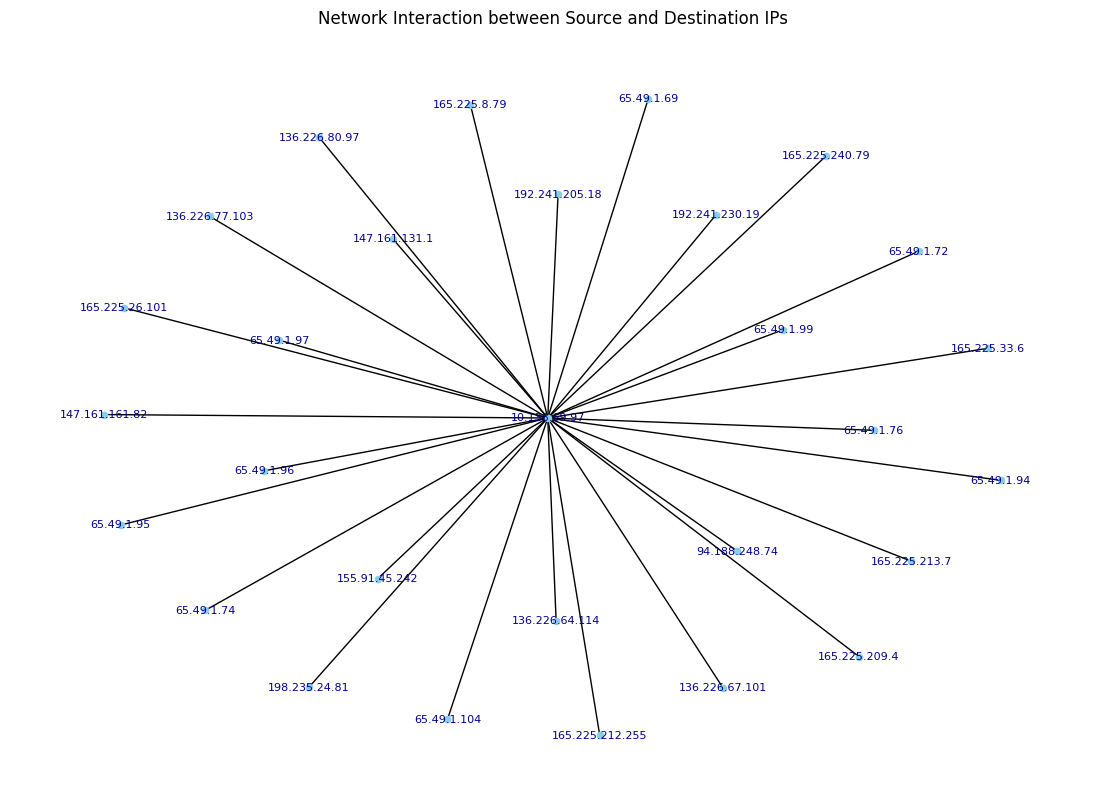

In [49]:
# Create a graph
G = nx.Graph()
# Add edges from source IP to destination IP
for idx, row in df.iterrows():
    G.add_edge(row['src_ip'], row['dst_ip'])
# Draw the network graph
plt.figure(figsize=(14, 10))
nx.draw_networkx(G, with_labels=True, node_size=20,font_size=8, node_color='skyblue', font_color='darkblue')
plt.title('Network Interaction between Source and Destination IPs')
plt.axis('off') # Turn off the axis
 # Show the plot
plt.show()

In [51]:
 # First, encode this column into binary labels
transformed_df['is_suspicious'] =(transformed_df['detection_types'] == 'waf_rule').astype(int)
 # Features and Labels
X = transformed_df[['bytes_in', 'bytes_out','scaled_duration_seconds']] # Numeric features
y = transformed_df['is_suspicious'] # Binary labels

In [53]:
 # Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)
 # Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100,random_state=42)
 # Train the model
rf_classifier.fit(X_train, y_train)
 # Predict on the test set
y_pred = rf_classifier.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)

In [57]:
 print("Model Accuracy: ",accuracy)

Model Accuracy:  1.0


In [59]:
print("Classification Report: ",classification)

Classification Report:                precision    recall  f1-score   support

           1       1.00      1.00      1.00        85

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85



In [61]:
df['is_suspicious'] = (df['detection_types'] =='waf_rule').astype(int)
 # Features and labels
X = df[['bytes_in', 'bytes_out']].values # Using only numeric features
y = df['is_suspicious'].values
 # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)
 # Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 # Neural network model
model = Sequential([Dense(8, activation='relu',input_shape=(X_train_scaled.shape[1],)),Dense(16, activation='relu'),Dense(1, activation='sigmoid')])
 # Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy',metrics=['accuracy'])
 # Train the model
history = model.fit(X_train_scaled, y_train, epochs=10,batch_size=8, verbose=1)
 # Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

Epoch 1/10
25/25 [==============================] - 2s 4ms/step - loss: 0.8016 - accuracy: 0.5635
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.7253 - accuracy: 0.8985
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6481 - accuracy: 0.8985
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.5585 - accuracy: 0.8985
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 0.4651 - accuracy: 0.9289
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3737 - accuracy: 0.9492
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 0.2923 - accuracy: 0.9492
Epoch 8/10
25/25 [==============================] - 0s 4ms/step - loss: 0.2256 - accuracy: 0.9492
Epoch 9/10
25/25 [==============================] - 0s 4ms/step - loss: 0.1744 - accuracy: 0.9898
Epoch 10/10
3/3 [==============================] - 0s 8ms/step - loss: 0.1158 - accuracy: 1.0000
Test Accuracy: 100.00

Epoch 1/10
5/5 [==============================] - 2s 96ms/step - loss: 0.6555 - accuracy: 0.8344 - val_loss: 0.5759 - val_accuracy: 1.0000
Epoch 2/10
5/5 [==============================] - 0s 24ms/step - loss: 0.5721 - accuracy: 1.0000 - val_loss: 0.4923 - val_accuracy: 1.0000
Epoch 3/10
5/5 [==============================] - 0s 21ms/step - loss: 0.4950 - accuracy: 1.0000 - val_loss: 0.4125 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 0s 17ms/step - loss: 0.4085 - accuracy: 1.0000 - val_loss: 0.3315 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 0s 15ms/step - loss: 0.3311 - accuracy: 1.0000 - val_loss: 0.2504 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 0s 14ms/step - loss: 0.2499 - accuracy: 1.0000 - val_loss: 0.1760 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 0s 15ms/step - loss: 0.1743 - accuracy: 1.0000 - val_loss: 0.1157 - val_accuracy: 1.0000
Epoch 8/10
5/5 [===========

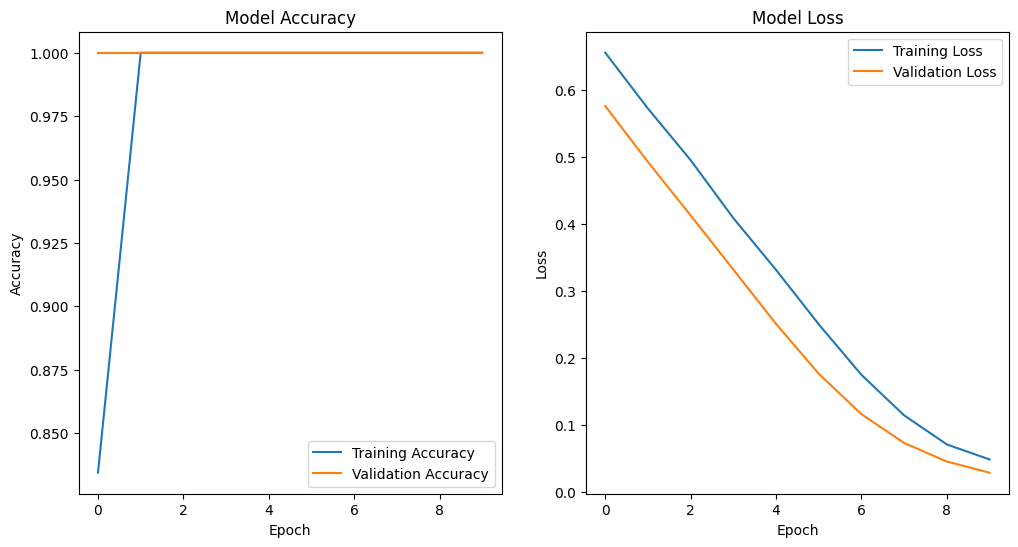

In [63]:
# Neural network model
model = Sequential([
Dense(128, activation='relu',input_shape=(X_train_scaled.shape[1],)),Dropout(0.5),Dense(128, activation='relu'),Dropout(0.5),Dense(1, activation='sigmoid')])
 # Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy',metrics=['accuracy'])
 # Train the model
history = model.fit(X_train_scaled, y_train, epochs=10,
batch_size=32, verbose=1, validation_split=0.2)
 # Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")
# Plotting the training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/10
5/5 [==============================] - 2s 104ms/step - loss: 0.6903 - accuracy: 0.6497 - val_loss: 0.6283 - val_accuracy: 1.0000
Epoch 2/10
5/5 [==============================] - 0s 23ms/step - loss: 0.6402 - accuracy: 0.9873 - val_loss: 0.5812 - val_accuracy: 1.0000
Epoch 3/10
5/5 [==============================] - 0s 20ms/step - loss: 0.5995 - accuracy: 0.9936 - val_loss: 0.5396 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 0s 19ms/step - loss: 0.5570 - accuracy: 1.0000 - val_loss: 0.5013 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 0s 20ms/step - loss: 0.5228 - accuracy: 1.0000 - val_loss: 0.4634 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 0s 20ms/step - loss: 0.4875 - accuracy: 1.0000 - val_loss: 0.4225 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 0s 20ms/step - loss: 0.4400 - accuracy: 1.0000 - val_loss: 0.3789 - val_accuracy: 1.0000
Epoch 8/10
5/5 [==========

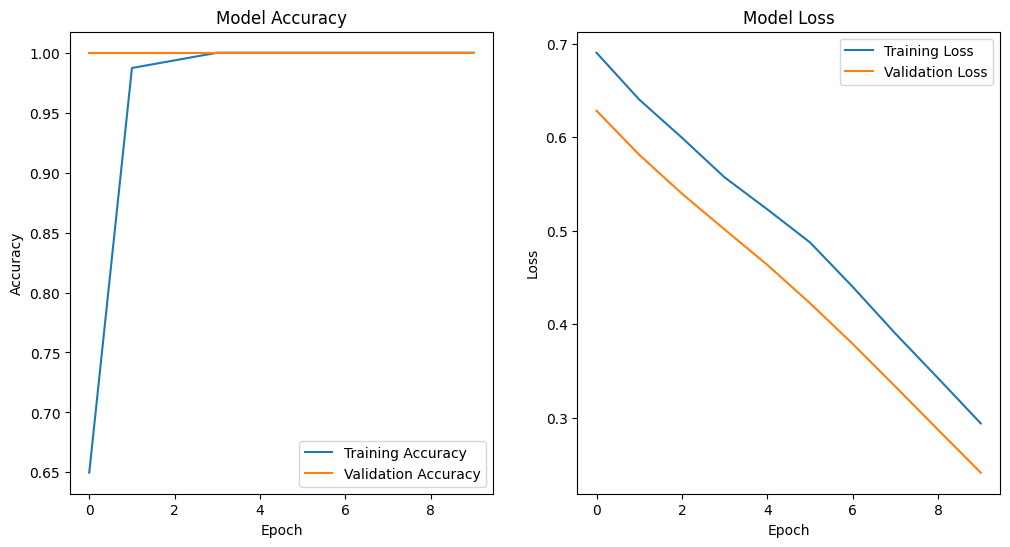

In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1,
X_train.shape[-1])).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1,X_test.shape[-1])).reshape(X_test.shape)
# Adjusting the network to accommodate the input size
model = Sequential([Conv1D(32, kernel_size=1, activation='relu',input_shape=(X_train_scaled.shape[1], 1)),Flatten(),Dense(64, activation='relu'),Dropout(0.5),Dense(1, activation='sigmoid')])
# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy',metrics=['accuracy'])
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10,batch_size=32, verbose=1, validation_split=0.2)
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")
# Plotting the training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()